In [23]:

from IPython.display import display
import pandas as pd
import altair as alt
from altair.utils.data import to_values

def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

In [6]:
conges = pd.read_csv("../../data/decompte_sources_saisies_15.02.2023.csv", sep=";")

In [8]:
conges = conges[conges.annee == 1789]

In [14]:
conges = conges.sort_values("nb_conges_cr", ascending=False)

In [16]:
first_conges = conges[:20]

In [29]:
first_conges_list = [dict(row) for i, row in first_conges.iterrows()]

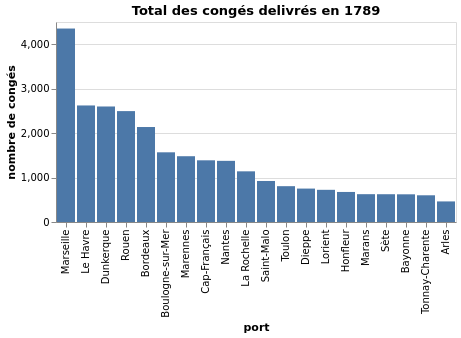

In [35]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Total des congés delivrés en 1789",
    "mark": "bar",
    "data": {
        "values": first_conges_list
    },
    "encoding": {
        "y": {
            "field": "nb_conges_cr",
            "type": "quantitative", 
            "title": "nombre de congés"
        },
        "x": {
            "field": "toponyme_standard_fr",
            "type": "nominal",
            "title": "port",
            "sort": "-y"
        }
    }
})